## Importació de llibreries i funcions pròpies

In [1]:
import pandas as pd
from auxiliary_functions import test_indepe_plot, test_indepe_bin_plot, mitjana_i_std_num, comptatge_i_percentatge_cat 
from listas import cat_var_ger, num_var_ger

## Càrrega i segmentació de les dades

In [2]:
taula = pd.read_pickle('./data/processed/dataframe.pkl')

AMB_PA = taula[taula["PA diagnosticada"] == 1.0]
AMB_PA_MECVV = taula[
    (taula["Dies entre primer ICD pneumònia i primer MECVV positiu"] < 30)]
SENSE_PA = taula[
           (taula["Dies entre primer ICD pneumònia i primer MECVV positiu"] > 30) &
           (taula['P diagnosticada'] == 1.0)]
TOTAL = taula

# Anàlisi descriptiva de les dades

### Comptatges i percentatges de variables categòriques per grup

In [3]:
llista_dfs = [('AMB_PA', AMB_PA), ('AMB_PA_MECVV', AMB_PA_MECVV), ('SENSE_PA', SENSE_PA), ('TOTAL', TOTAL)]

comptatge_i_percentatge_cat(llista_dfs, cat_var_ger)

+------------------------+--------------+-------+------------+--------------+
|        Columna         |  DataFrame   | Valor | Comptatges | Percentatges |
+------------------------+--------------+-------+------------+--------------+
|    Caigudes prèvies    |    AMB_PA    |  0.0  |     17     |    94.44%    |
|                        |              |  1.0  |     1      |    5.56%     |
|                        |              |       |            |              |
|    Caigudes prèvies    | AMB_PA_MECVV |  0.0  |     6      |   100.00%    |
|                        |              |       |            |              |
|    Caigudes prèvies    |   SENSE_PA   |  0.0  |     9      |    90.00%    |
|                        |              |  1.0  |     1      |    10.00%    |
|                        |              |       |            |              |
|    Caigudes prèvies    |    TOTAL     |  0.0  |     39     |    92.86%    |
|                        |              |  1.0  |     3      |  

### Mitjanes i desviacions estàndard de variables numèriques per grup

In [4]:
llista_dfs = [('AMB_PA', AMB_PA), ('AMB_PA_MECVV', AMB_PA_MECVV), ('SENSE_PA', SENSE_PA), ('TOTAL', TOTAL)]

mitjana_i_std_num(llista_dfs, num_var_ger)

+----------+--------------+---------+---------------------+
| Columna  |  DataFrame   | Mitjana | Desviació Estàndard |
+----------+--------------+---------+---------------------+
| Charlson |    AMB_PA    |  10.17  |        10.42        |
|          |              |         |                     |
| Charlson | AMB_PA_MECVV |  15.83  |        12.62        |
|          |              |         |                     |
| Charlson |   SENSE_PA   |  16.50  |        12.00        |
|          |              |         |                     |
| Charlson |    TOTAL     |  12.43  |        13.11        |
|          |              |         |                     |
+----------+--------------+---------+---------------------+


C:\Users\maria\PycharmProjects\practicum\auxiliary_functions.py:1111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col],


# Síndromes geriàtrics

## Index de Charlson

Comparació distributiva. Test d'independència. Test d'independència

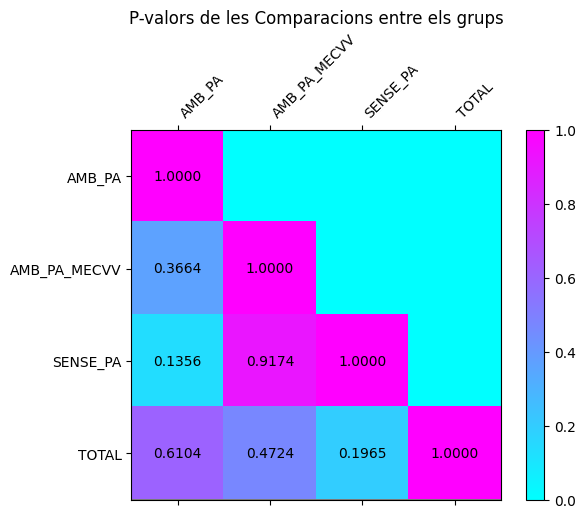

In [5]:
test_indepe_plot({'AMB_PA': AMB_PA['Charlson'], 'AMB_PA_MECVV': AMB_PA_MECVV['Charlson'], 'SENSE_PA': SENSE_PA['Charlson'], 'TOTAL': TOTAL['Charlson']})

## Caigudes prèvies

Comparació distributiva. Test d'independència. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0699
P-value: 0.7915
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


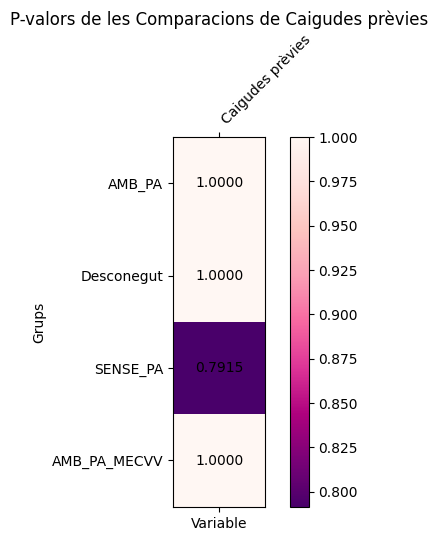

{'AMB_PA': 1.0,
 'Desconegut': 1.0,
 'SENSE_PA': 0.7915487896423128,
 'AMB_PA_MECVV': 1.0}

In [6]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Caigudes prèvies'])

## Deliris

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 1.3048
P-value: 0.2533
---
Grup: SENSE_PA
Chi-squared: 6.6753
P-value: 0.0098
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


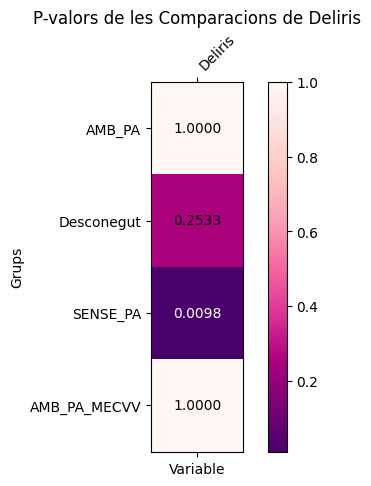

{'AMB_PA': 1.0,
 'Desconegut': 0.25334205111914276,
 'SENSE_PA': 0.009775783447183542,
 'AMB_PA_MECVV': 1.0}

In [7]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Deliris'])

## Demència

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 1.1127
P-value: 0.2915
---
Grup: Desconegut
Chi-squared: 1.6365
P-value: 0.2008
---
Grup: SENSE_PA
Chi-squared: 0.3411
P-value: 0.5592
---
Grup: AMB_PA_MECVV
Chi-squared: 0.1527
P-value: 0.6960
---


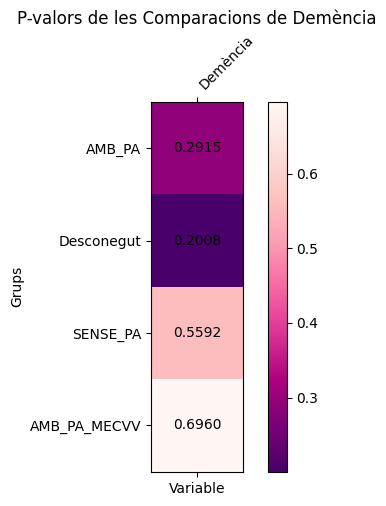

{'AMB_PA': 0.29150005460696704,
 'Desconegut': 0.20080262376436617,
 'SENSE_PA': 0.559202871475027,
 'AMB_PA_MECVV': 0.6959642874823095}

In [8]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Demència'])

## Síndrome depressiu

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.1750
P-value: 0.6757
---
Grup: Desconegut
Chi-squared: 0.0791
P-value: 0.7786
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


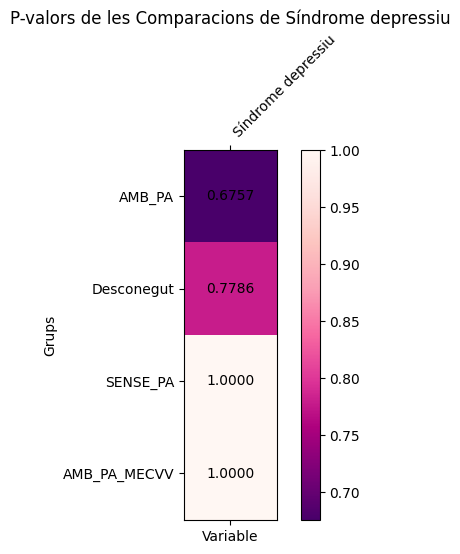

{'AMB_PA': 0.6757058487030954,
 'Desconegut': 0.7785769383804787,
 'SENSE_PA': 1.0,
 'AMB_PA_MECVV': 1.0}

In [9]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Síndrome depressiu'])

## Incontinència urinària

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.7238
P-value: 0.3949
---
Grup: Desconegut
Chi-squared: 0.3492
P-value: 0.5546
---
Grup: SENSE_PA
Chi-squared: 0.3013
P-value: 0.5831
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0483
P-value: 0.8261
---


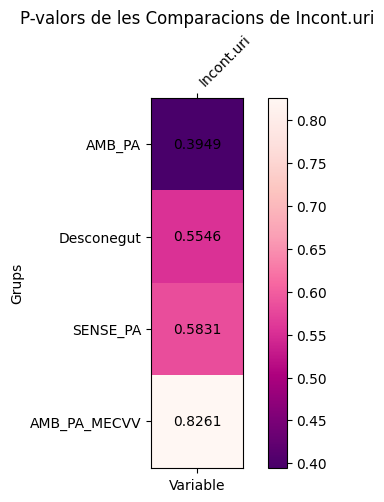

{'AMB_PA': 0.39489858133667644,
 'Desconegut': 0.5545934139781792,
 'SENSE_PA': 0.5830613278388281,
 'AMB_PA_MECVV': 0.8261303553805796}

In [10]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Incont.uri'])

## Incontinència fecal 

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 2.9531
P-value: 0.0857
---
Grup: Desconegut
Chi-squared: 0.6959
P-value: 0.4042
---
Grup: SENSE_PA
Chi-squared: 0.0851
P-value: 0.7705
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


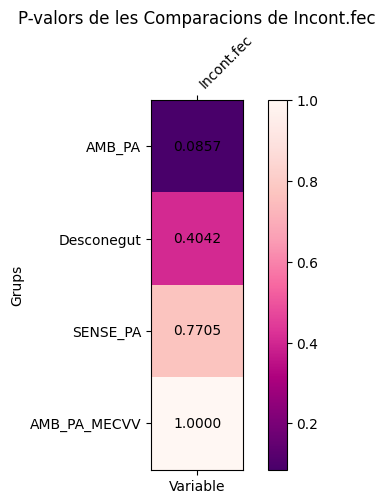

{'AMB_PA': 0.08571167175529863,
 'Desconegut': 0.40417075199227426,
 'SENSE_PA': 0.7704554055608123,
 'AMB_PA_MECVV': 1.0}

In [11]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Incont.fec'])

## Úlceres de pressió

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0213
P-value: 0.8839
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


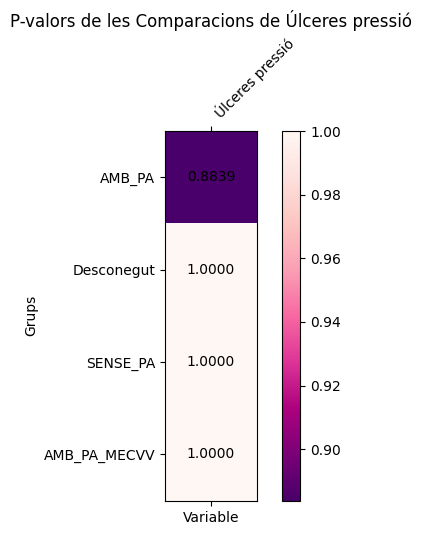

{'AMB_PA': 0.883852568733343,
 'Desconegut': 1.0,
 'SENSE_PA': 1.0,
 'AMB_PA_MECVV': 1.0}

In [12]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Úlceres pressió'])

## Immobilitat

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


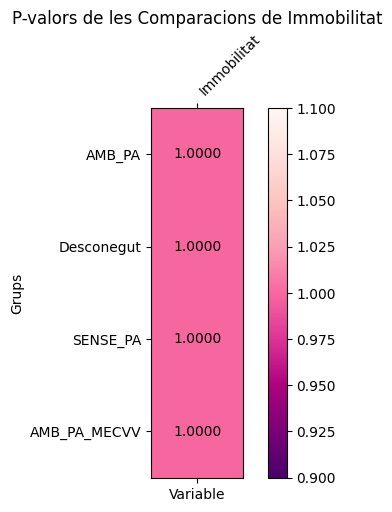

{'AMB_PA': 1.0, 'Desconegut': 1.0, 'SENSE_PA': 1.0, 'AMB_PA_MECVV': 1.0}

In [13]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Immobilitat'])

## Confusió

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 1.3048
P-value: 0.2533
---
Grup: SENSE_PA
Chi-squared: 6.6753
P-value: 0.0098
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


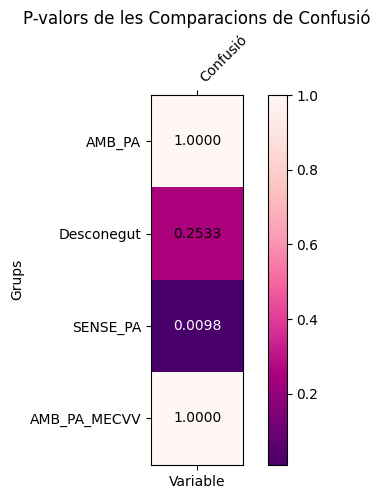

{'AMB_PA': 1.0,
 'Desconegut': 0.25334205111914276,
 'SENSE_PA': 0.009775783447183542,
 'AMB_PA_MECVV': 1.0}

In [14]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Confusió'])

## Osteoporosi

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


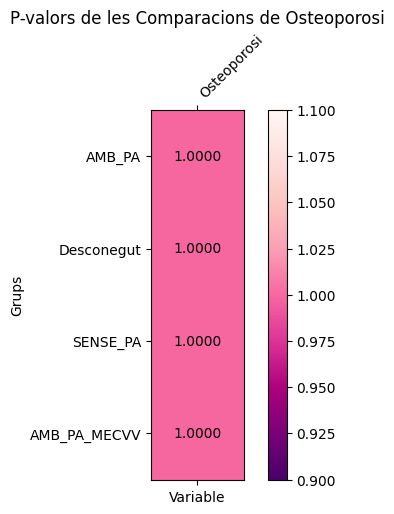

{'AMB_PA': 1.0, 'Desconegut': 1.0, 'SENSE_PA': 1.0, 'AMB_PA_MECVV': 1.0}

In [15]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Osteoporosi'])

## Sarcopènia

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.2734
P-value: 0.6010
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.3434
P-value: 0.5579
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


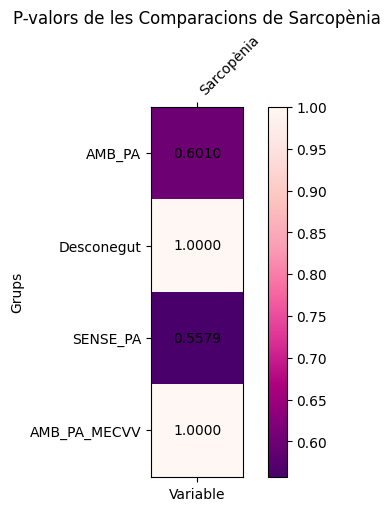

{'AMB_PA': 0.6010351339508606,
 'Desconegut': 1.0,
 'SENSE_PA': 0.5578856189581122,
 'AMB_PA_MECVV': 1.0}

In [16]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Sarcopènia'])

## Trastorns del son

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


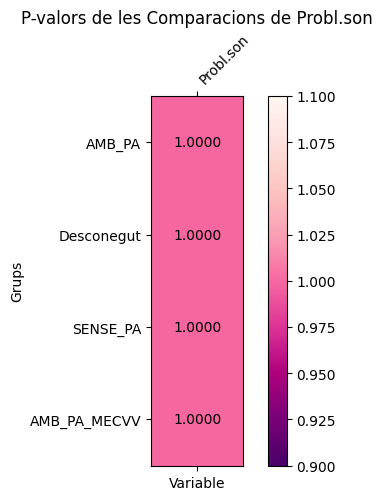

{'AMB_PA': 1.0, 'Desconegut': 1.0, 'SENSE_PA': 1.0, 'AMB_PA_MECVV': 1.0}

In [17]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Probl.son'])

## Dolor crònic

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


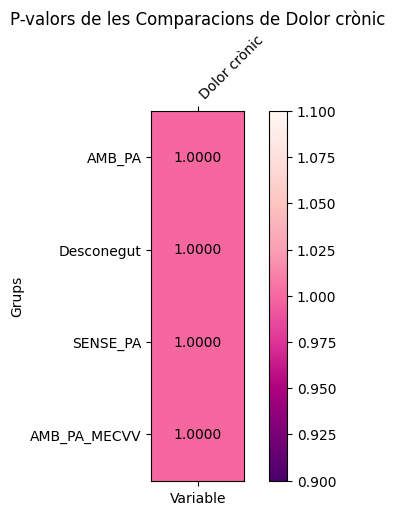

{'AMB_PA': 1.0, 'Desconegut': 1.0, 'SENSE_PA': 1.0, 'AMB_PA_MECVV': 1.0}

In [18]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Dolor crònic'])

## Iatrogènic

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


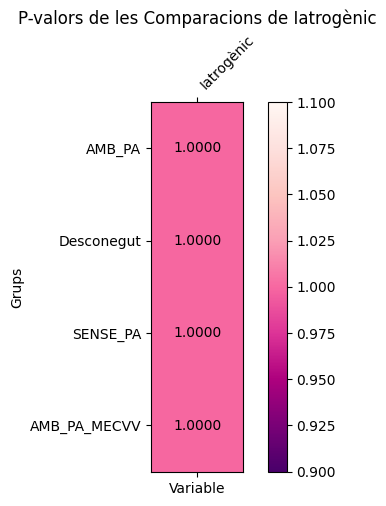

{'AMB_PA': 1.0, 'Desconegut': 1.0, 'SENSE_PA': 1.0, 'AMB_PA_MECVV': 1.0}

In [19]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Iatrogènic'])

## Restrenyiment

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


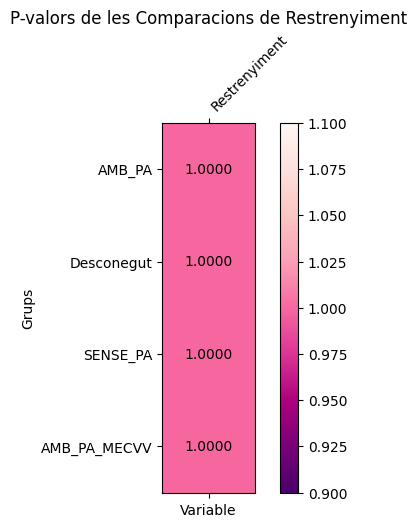

{'AMB_PA': 1.0, 'Desconegut': 1.0, 'SENSE_PA': 1.0, 'AMB_PA_MECVV': 1.0}

In [20]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Restrenyiment'])

# Historial mèdic/comorbiditats

## Malalties CV

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0699
P-value: 0.7915
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


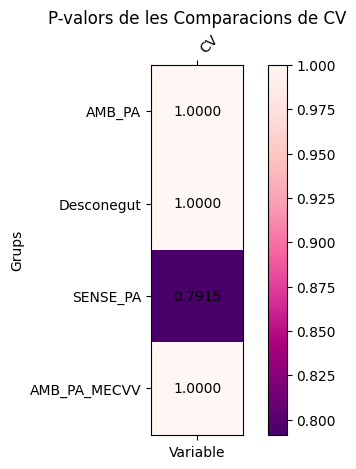

{'AMB_PA': 1.0,
 'Desconegut': 1.0,
 'SENSE_PA': 0.7915487896423128,
 'AMB_PA_MECVV': 1.0}

In [21]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['CV'])

## Malalties del cor

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.1750
P-value: 0.6757
---
Grup: Desconegut
Chi-squared: 0.0791
P-value: 0.7786
---
Grup: SENSE_PA
Chi-squared: 4.5405
P-value: 0.0331
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


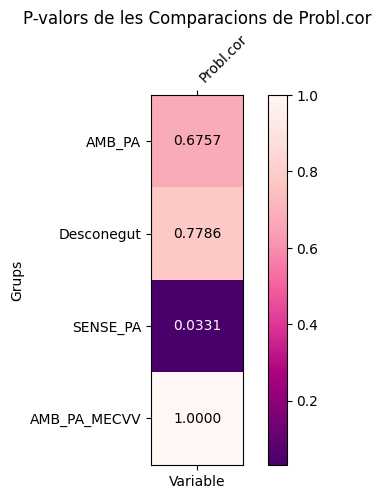

{'AMB_PA': 0.6757058487030954,
 'Desconegut': 0.7785769383804787,
 'SENSE_PA': 0.03310113777404396,
 'AMB_PA_MECVV': 1.0}

In [22]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Probl.cor'])

## Malalties neurodegeneratives

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.2734
P-value: 0.6010
---
Grup: Desconegut
Chi-squared: 0.2088
P-value: 0.6477
---
Grup: SENSE_PA
Chi-squared: 0.3434
P-value: 0.5579
---
Grup: AMB_PA_MECVV
Chi-squared: 1.8966
P-value: 0.1685
---


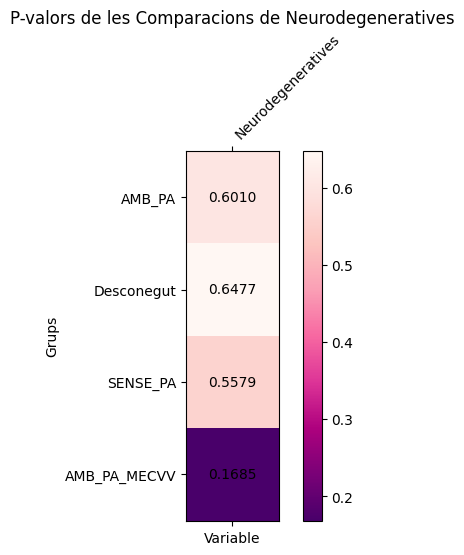

{'AMB_PA': 0.6010351339508606,
 'Desconegut': 0.6477373423892978,
 'SENSE_PA': 0.5578856189581122,
 'AMB_PA_MECVV': 0.16846358985022467}

In [23]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Neurodegeneratives'])

## Diabetis mellitus

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0120
P-value: 0.9128
---
Grup: SENSE_PA
Chi-squared: 0.2477
P-value: 0.6187
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


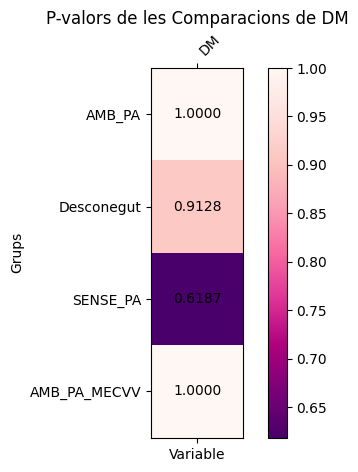

{'AMB_PA': 1.0,
 'Desconegut': 0.9128480881141996,
 'SENSE_PA': 0.6187234424146182,
 'AMB_PA_MECVV': 1.0}

In [24]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['DM'])

## Hepatopaties

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0673
P-value: 0.7953
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


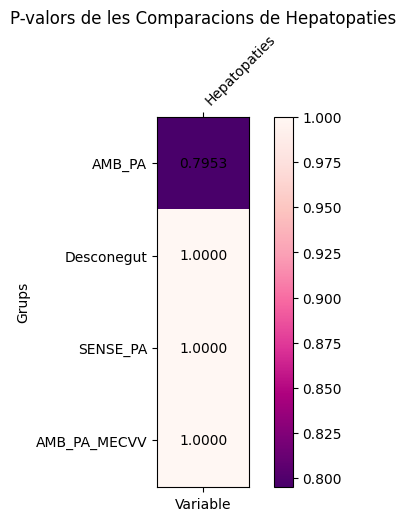

{'AMB_PA': 0.7952978836076402,
 'Desconegut': 1.0,
 'SENSE_PA': 1.0,
 'AMB_PA_MECVV': 1.0}

In [25]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Hepatopaties'])

## Neoplàsies

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.2734
P-value: 0.6010
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.3434
P-value: 0.5579
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


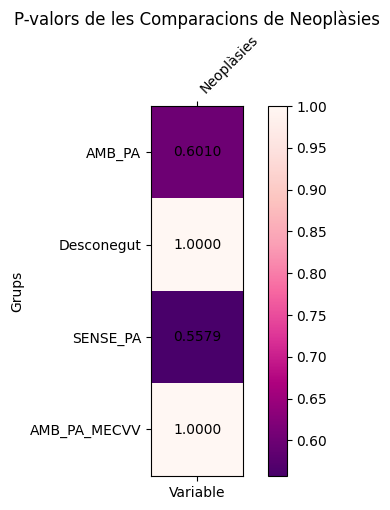

{'AMB_PA': 0.6010351339508606,
 'Desconegut': 1.0,
 'SENSE_PA': 0.5578856189581122,
 'AMB_PA_MECVV': 1.0}

In [26]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Neoplàsies'])

## Malaltia renal crònica (creatinina > 1.5mg/dL)

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.9049
P-value: 0.3415
---
Grup: Desconegut
Chi-squared: 2.4630
P-value: 0.1166
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


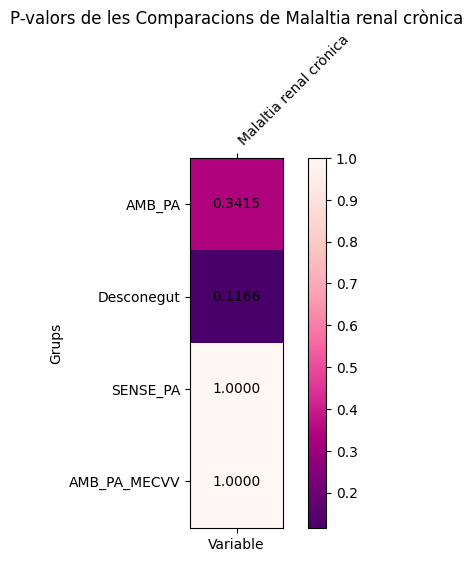

{'AMB_PA': 0.3414673540500757,
 'Desconegut': 0.11655698491267474,
 'SENSE_PA': 1.0,
 'AMB_PA_MECVV': 1.0}

In [27]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Malaltia renal crònica'])

## Fallida renal aguda (o insuficiència renal aguda)

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.1969
P-value: 0.6573
---
Grup: Desconegut
Chi-squared: 0.8919
P-value: 0.3450
---
Grup: SENSE_PA
Chi-squared: 4.7732
P-value: 0.0289
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


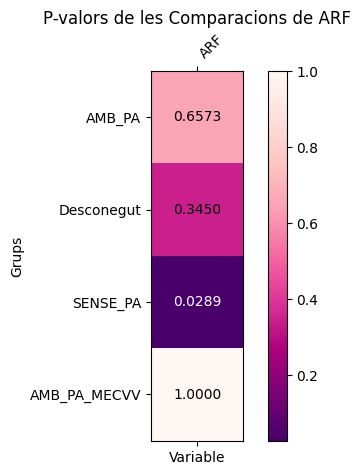

{'AMB_PA': 0.6572551687192699,
 'Desconegut': 0.3449677174298882,
 'SENSE_PA': 0.028905323724358233,
 'AMB_PA_MECVV': 1.0}

In [28]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['ARF'])

## Marejos/síncope/lipotímia/reacció vasovagal

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0386
P-value: 0.8443
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


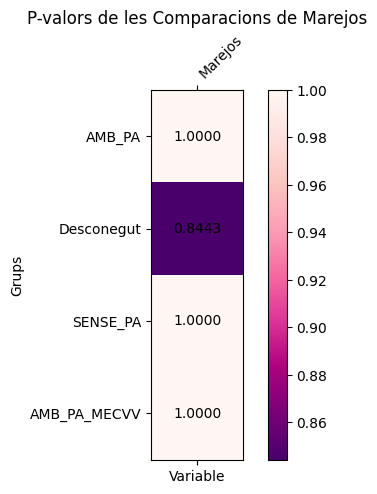

{'AMB_PA': 1.0,
 'Desconegut': 0.8443123997052453,
 'SENSE_PA': 1.0,
 'AMB_PA_MECVV': 1.0}

In [29]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Marejos'])

## VIH

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


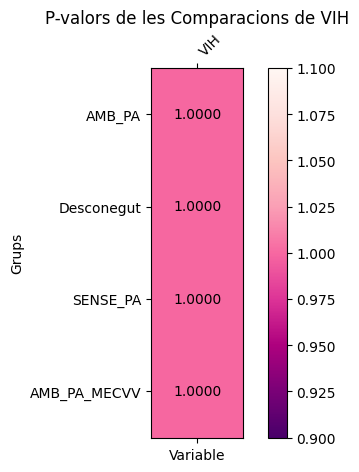

{'AMB_PA': 1.0, 'Desconegut': 1.0, 'SENSE_PA': 1.0, 'AMB_PA_MECVV': 1.0}

In [30]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['VIH'])

## Psicosi

#### Comparació distributiva. Test d'independència. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


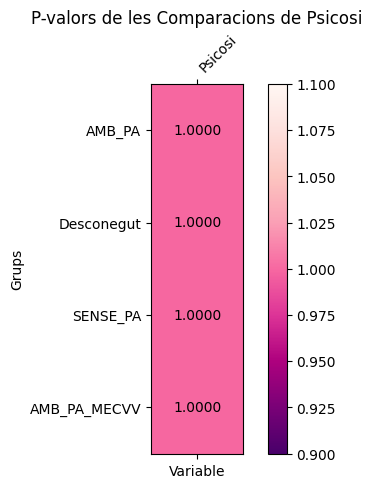

{'AMB_PA': 1.0, 'Desconegut': 1.0, 'SENSE_PA': 1.0, 'AMB_PA_MECVV': 1.0}

In [31]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Psicosi'])

## Deficiències nutricionals

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


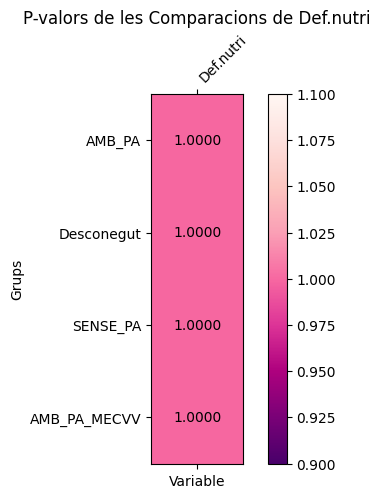

{'AMB_PA': 1.0, 'Desconegut': 1.0, 'SENSE_PA': 1.0, 'AMB_PA_MECVV': 1.0}

In [32]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Def.nutri'])